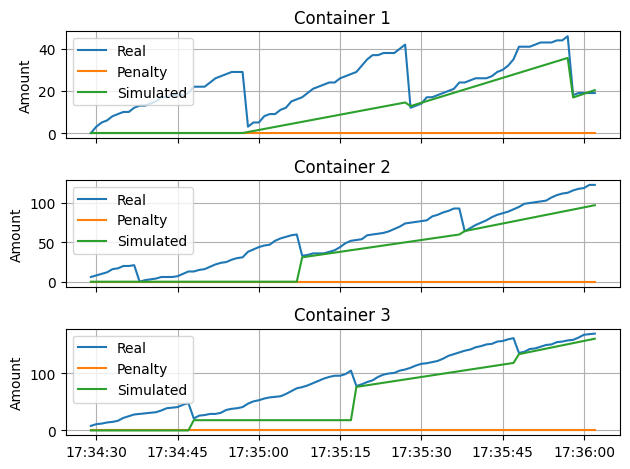

In [33]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import json
import numpy as np
import os

def count_files_with_prefix(folder_path, prefix):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.startswith(prefix):
            count += 1
    return count

def column(matrix, i):
    return [row[i] for row in matrix]

# Lists to store the data
rdates = []
ramounts = []
penalties = []


# Read data from the CSV file
with open(f'rcontainer_log.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip the header row
    for row in csvreader:
        date = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S')
        amount = json.loads(row[1])
        penalty = json.loads(row[2])
        rdates.append(date)
        ramounts.append(amount)
        penalties.append(penalty)

sdates = []
samounts = []

with open(f'scontainer_log.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip the header row
    for row in csvreader:
        date = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S')
        amount = json.loads(row[1])
        sdates.append(date)
        samounts.append(amount)

n = len(ramounts[0])

# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

data = [column(ramounts,0), column(penalties,0),column(samounts,0)]
data = list(map(list, zip(*data)))

# Plot on the first subplot
ax1.plot(rdates, data, marker='', linestyle='-', label=['Real', 'Penalty', 'Simulated'])
ax1.set_title('Container 1')
ax1.set_ylabel('Amount')
ax1.grid(True)
ax1.legend()

data = [column(ramounts,1), column(penalties,1),column(samounts,1)]
data = list(map(list, zip(*data)))

# Plot on the second subplot
ax2.plot(rdates, data, marker='', linestyle='-', label=['Real', 'Penalty', 'Simulated'])
ax2.set_title('Container 2')
ax2.set_ylabel('Amount')
ax2.grid(True)
ax2.legend()

data = [column(ramounts,2), column(penalties,2),column(samounts,2)]
data = list(map(list, zip(*data)))

ax3.plot(rdates, data, marker='', linestyle='-', label=['Real', 'Penalty', 'Simulated'])
ax3.set_title('Container 3')
ax3.set_ylabel('Amount')
ax3.grid(True)
ax3.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



In [34]:

prefix = "dronelog"

file_count = count_files_with_prefix(folder_path, prefix)
print(f"Number of files with prefix '{prefix}': {file_count}")

for n in range(file_count):
        dates = []
        idles = []
        spaces = []
        with open(f'{folder_path}/{prefix}{n+1}.csv', 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                next(csvreader)  # Skip the header row
                for row in csvreader:
                        date = datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S')
                        idle = ast.literal_eval(row[2])
                        space = json.loads(row[3])
                        dates.append(date)
                        idles.append(idle)
                        spaces.append(space)

# Create the plot
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        # Plot on the first subplot
        ax1.plot(dates, idles, marker='', linestyle='-', label='Plot 1')
        ax1.set_title('Plot 1')
        ax1.set_ylabel('Y Values')
        ax1.grid(True)
        ax1.legend()

        # Plot on the second subplot
        ax2.plot(dates, spaces, marker='', linestyle='-', label='Plot 2')
        ax2.set_title('Plot 2')
        ax2.set_xlabel('X Values')
        ax2.set_ylabel('Y Values')
        ax2.grid(True)
        ax2.legend()

        # Adjust layout and display the plots
        plt.tight_layout()
        plt.show()

        count_true = idles.count(True)
        count_false = idles.count(False)
        labels = ["Idle", "Busy"]
        sizes = [count_true, count_false]
        colors = ["green", "red"]
        explode = (0.1, 0)  # Explode the 1st slice (zeros) slightly

        plt.figure(figsize=(6, 6))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
        plt.axis('equal')
        plt.title('Idle-Busy Distribution')

        # Show the pie chart
        plt.show()

NameError: name 'folder_path' is not defined